In [ ]:
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

shell_call("sudo apt install libgsl-dev")

In [ ]:
install.packages("copula")

In [6]:
library(copula)

In [45]:
data <- readRDS('var_16.rds')
names(data)

[1] "predictor"                 "predictor_DistrType"      
[3] "predictor_DistrParameters" "output"                   
[5] "output_DistrType"          "output_DistrParameters"

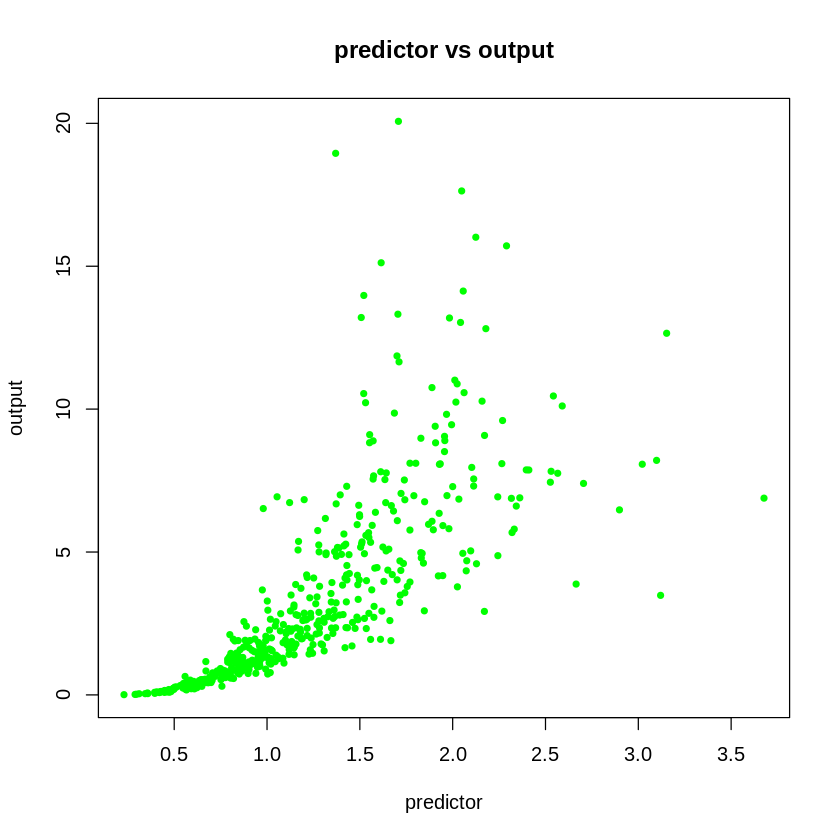

In [46]:
plot(data$predictor,data$output,main = 'predictor vs output', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')

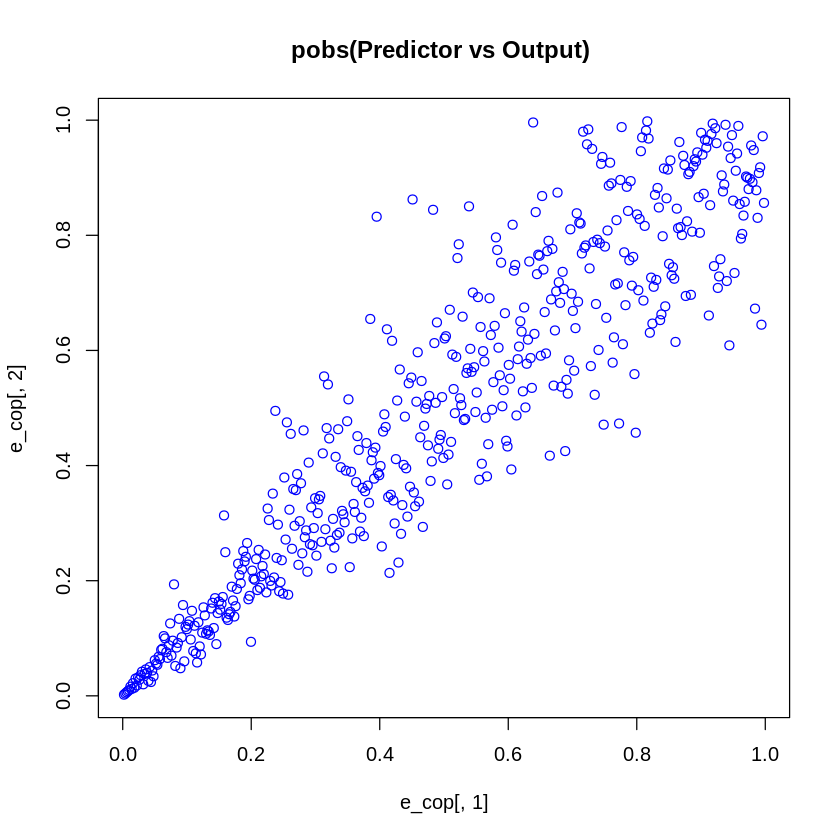

In [47]:
pred_out <- cbind(data$predictor,data$output)
e_cop <-pobs(pred_out)
plot(e_cop[,1],e_cop[,2],pch = 21,main ="pobs(Predictor vs Output) ",col = "blue")

In [48]:
#Normal copula
  normal_copula<-normalCopula(param=0,dim=2)
#Student copula
  t_copula <-ellipCopula(family = "t",param = 0,dim = 2)
#Frank copula
  Frank_copula<-frankCopula(param=5,dim=2)
#Clayton
  Clayton_copula<-claytonCopula(param=5,dim=2)

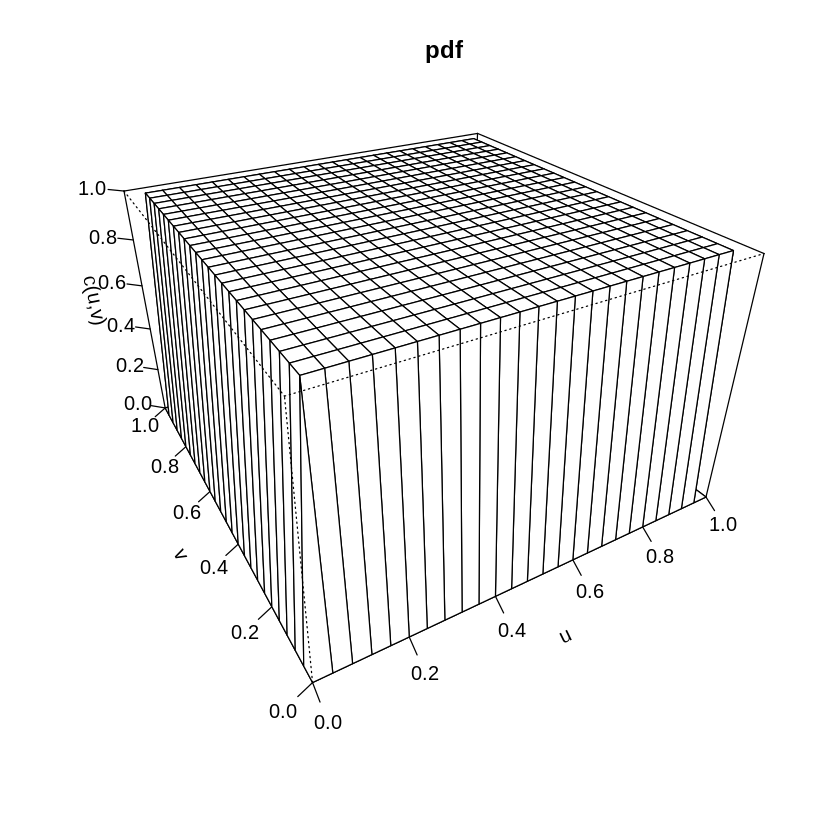

In [40]:
persp(normal_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

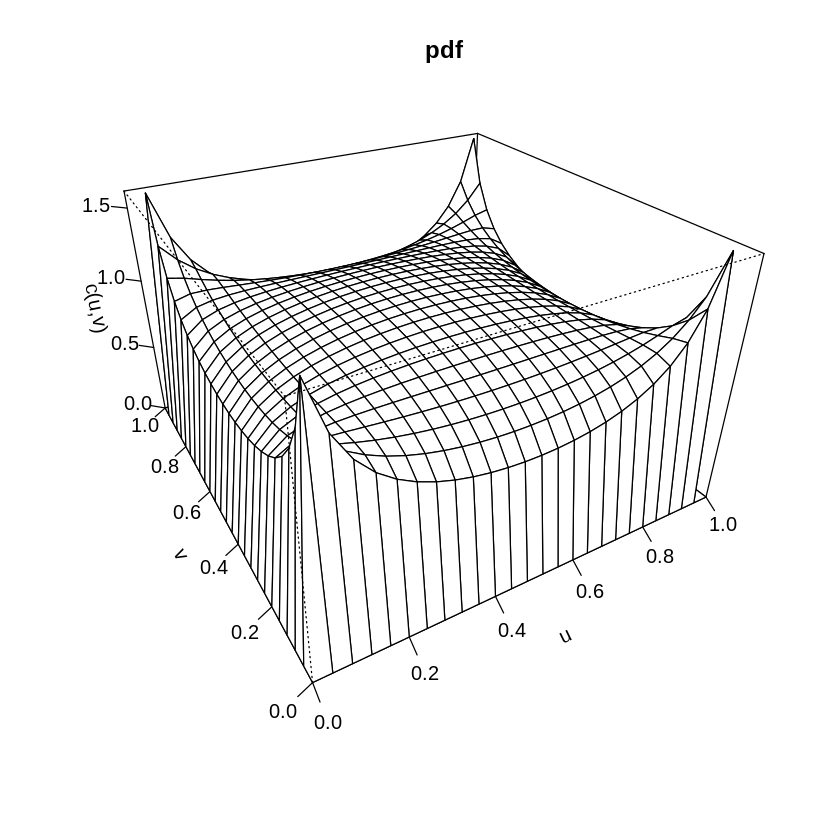

In [18]:
persp(t_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

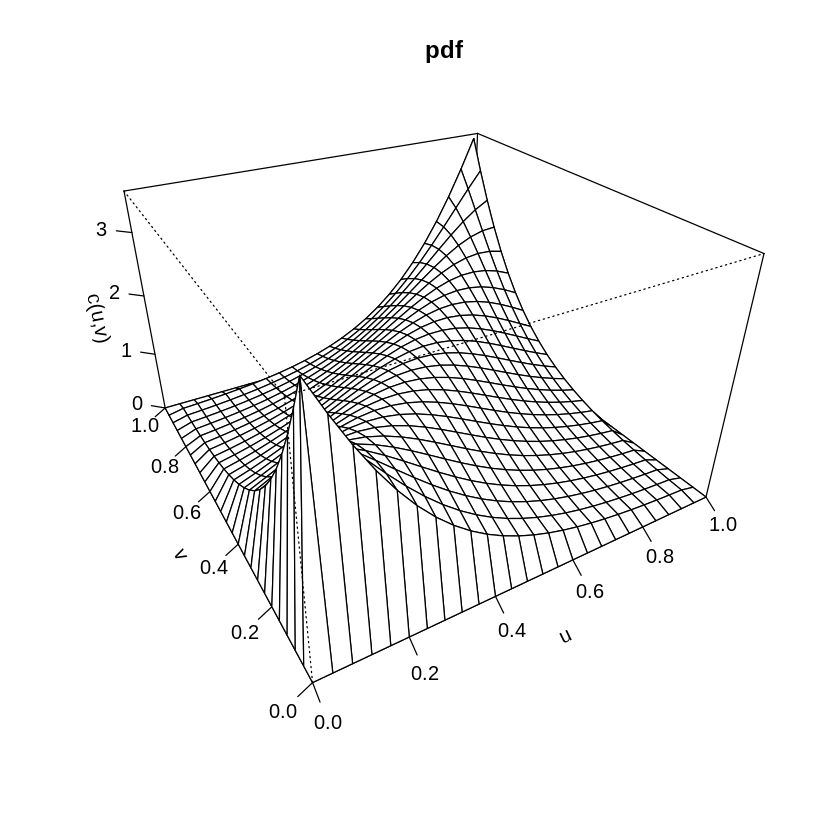

In [20]:
persp(Frank_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

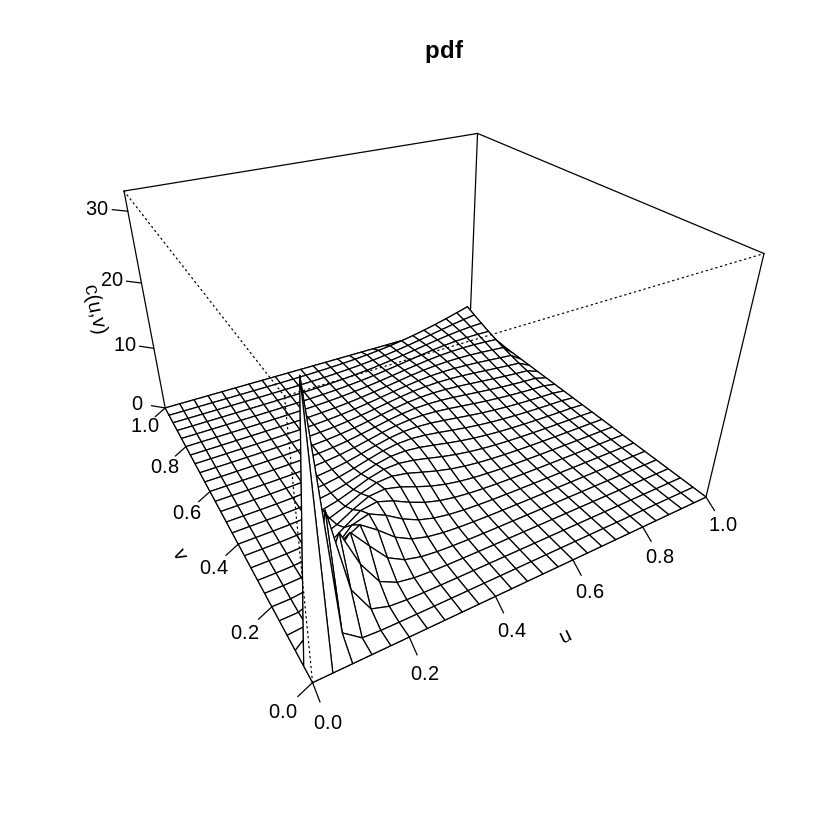

In [22]:
persp(Clayton_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

In [49]:
my.normal_copula.fit<-fitCopula(normal_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

parameters <- my.normal_copula.fit@copula@parameters
parameters

[1] 0.9003062

In [64]:
my.normal_copula.fit@loglik

[1] 411.1333

In [50]:
my.t_copula.fit<-fitCopula(t_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

parameters <- my.t_copula.fit@copula@parameters
parameters

[1] 0.9183361 3.3053172
attr(,"fixed")
[1] FALSE FALSE

In [65]:
my.t_copula.fit@loglik

[1] 444.8901

In [51]:
my.Frank_copula.fit<-fitCopula(Frank_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

parameters <- my.Frank_copula.fit@copula@parameters
parameters

[1] 15.19344

In [66]:
my.Frank_copula.fit@loglik

[1] 464.578

In [68]:
my.Clayton_copula.fit<-fitCopula(Clayton_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

parameters <- my.Clayton_copula.fit@copula@parameters
parameters

[1] 6.448645

In [67]:
my.Clayton_copula.fit@loglik

[1] 571.0526

In [69]:
best_parameters <- parameters

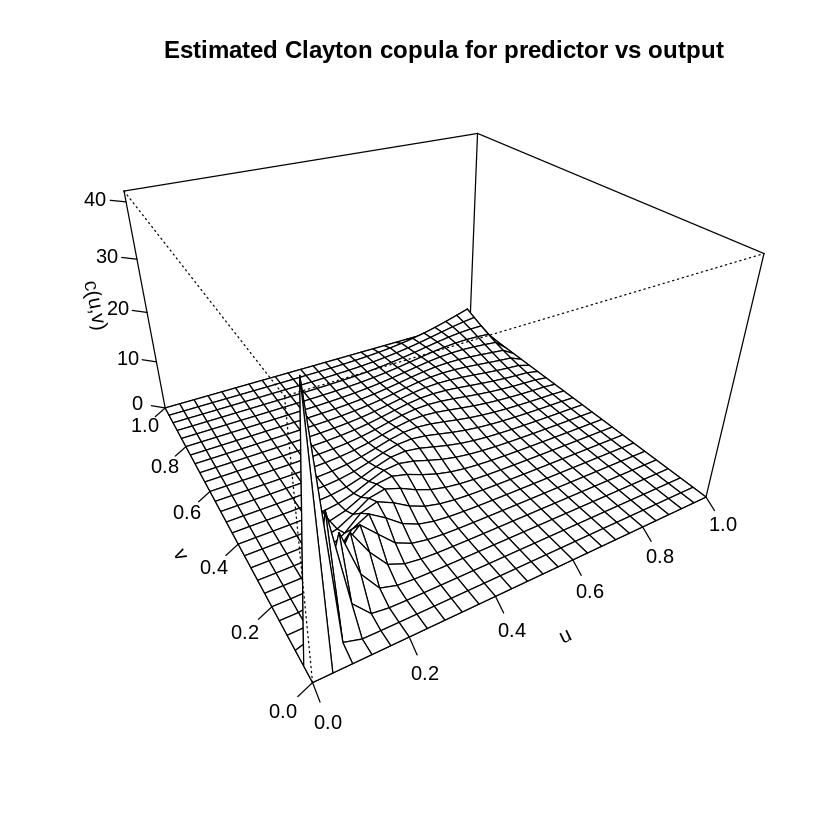

In [70]:
Clayton_copula@parameters<-parameters
persp(Clayton_copula, dCopula, main="Estimated Clayton copula for predictor vs output",xlab="u", ylab="v", zlab="c(u,v)")

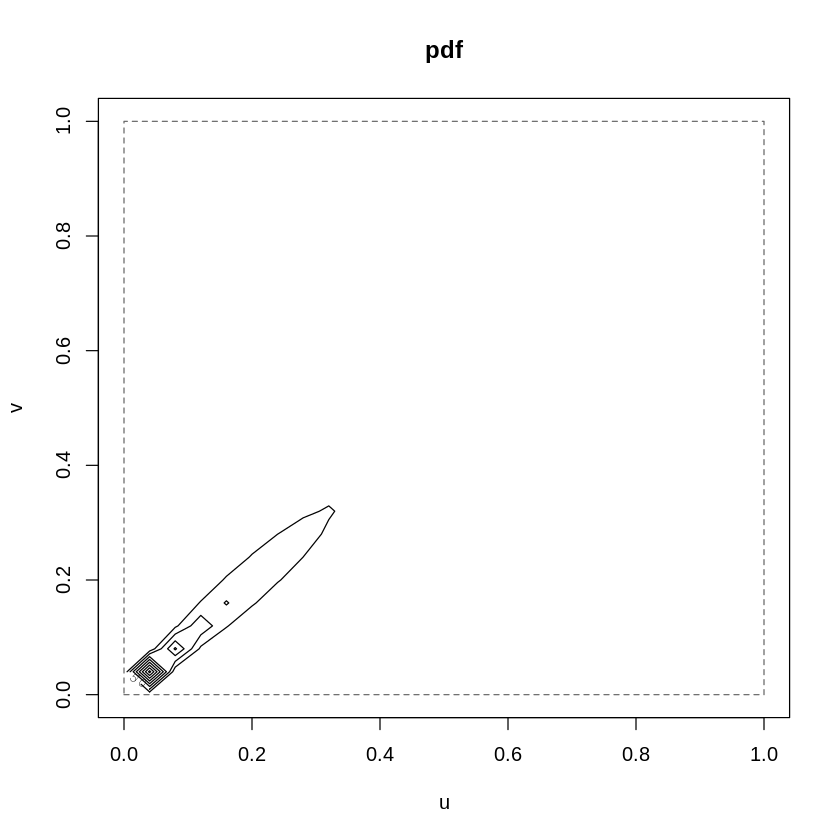

In [71]:
contour(Clayton_copula,dCopula, main="pdf",xlab="u", ylab="v")

In [72]:
data$predictor_DistrType

[1] "gamma"

In [73]:
data$predictor_DistrParameters


[1] 5 4

In [74]:
data$output_DistrType

[1] "exponential"

In [75]:
data$output_DistrParameters

[1] 1.0 0.3

In [60]:
predictor.copula <- pgamma(data$predictor, data$predictor_DistrParameters[1], data$predictor_DistrParameters[2])
output.copula <- pexp(data$output, rate = data$output_DistrParameters[2])

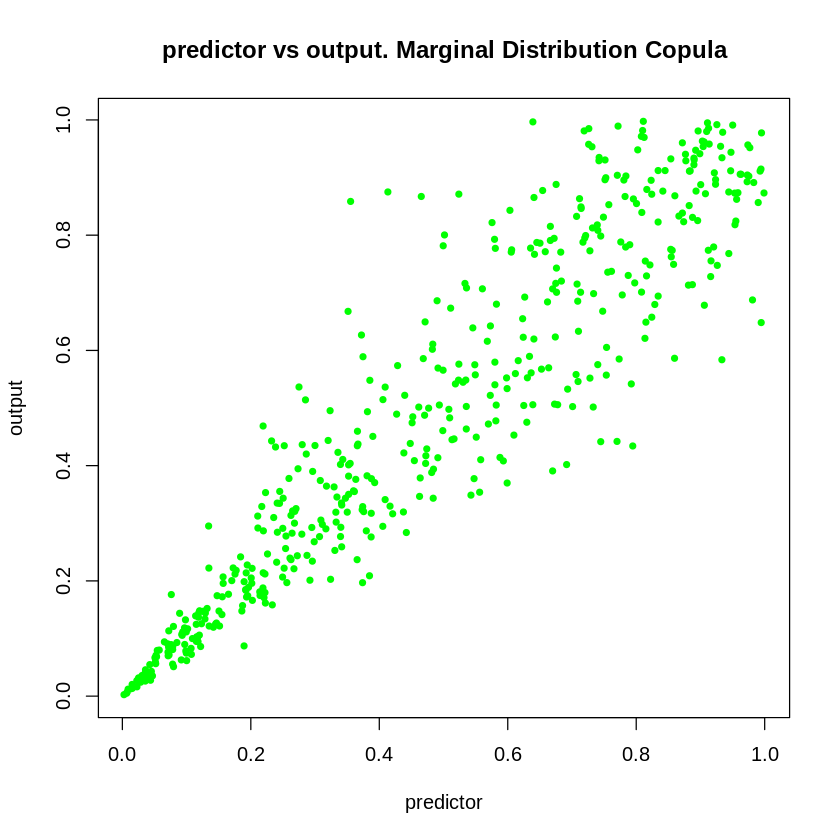

In [76]:
plot(predictor.copula,output.copula,main = 'predictor vs output. Marginal Distribution Copula', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')

In [78]:
quantileLevel <- function(numCopula,copula, theta,alpha)
{
  if (numCopula == 1)
  {
#Gaussian
    q <- pnorm(qnorm(alpha) *sqrt(1-theta*theta)  + theta* qnorm(copula[,1]))
  }
  if (numCopula == 2)
  {

      #Student
  }
  if (numCopula == 3)
  {
    #Frank
  }
  if (numCopula == 4)
  {
    #Clayton
    q <- ((alpha^(-theta/(1 + theta)) - 1) * (copula[,1]^(-theta)) + 1)^(-1/theta)
  }
  return(q)
}
copula <- cbind(predictor.copula,output.copula)
alpha <- 0.95
copulanum <- 4
parameters <- my.Clayton_copula.fit@copula@parameters
quantile <- quantileLevel(copulanum,copula, parameters,alpha)

In [79]:
(anomalindex <- which(copula[,2]>quantile))

[1]  17  41  82 112 135 144 159 185 225 233 234 244 250 259 267 288 308 313 323
[20] 364 375 401 414 442 452 455 471

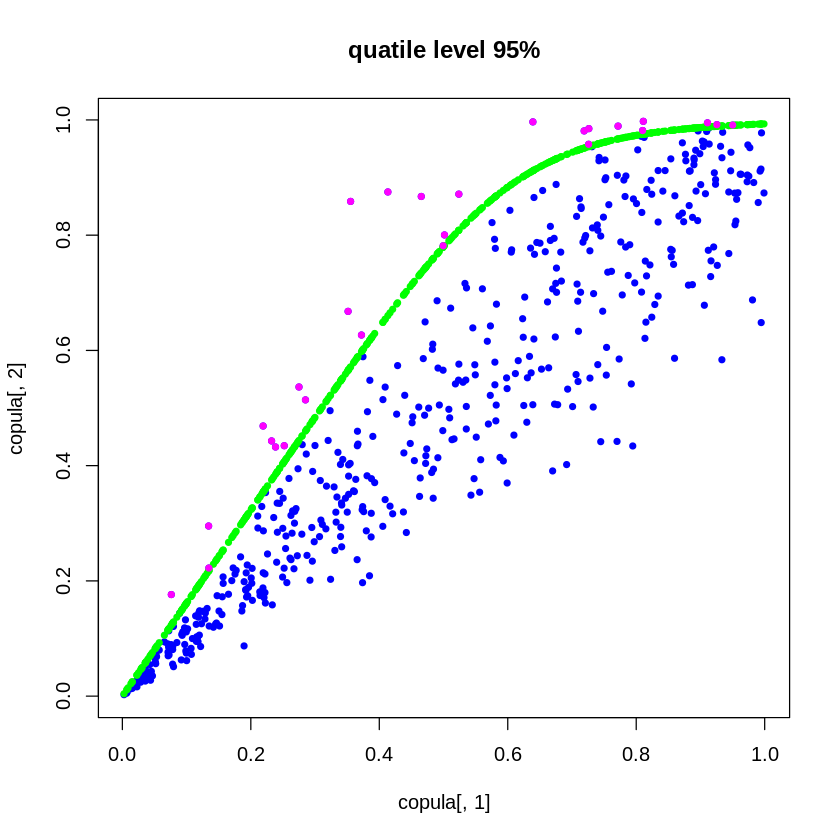

In [80]:
plot(copula[,1],copula[,2],pch =20,col = "blue",main = "quatile level 95%")
points(copula[,1],quantile,col = "green",pch = 20)
points(copula[anomalindex,1],copula[anomalindex,2],col = "magenta",pch = 20)

In [81]:
anomal_predictor <- data$predictor[anomalindex]
anomal_output    <- data$output[anomalindex]
head(anomal_predictor)

[1] 2.2900898 0.9797488 0.8264614 0.8755738 1.6147909 0.7996259

In [82]:
head(anomal_output)

[1] 15.712849  6.520430  1.887651  2.563411 15.121111  2.108794

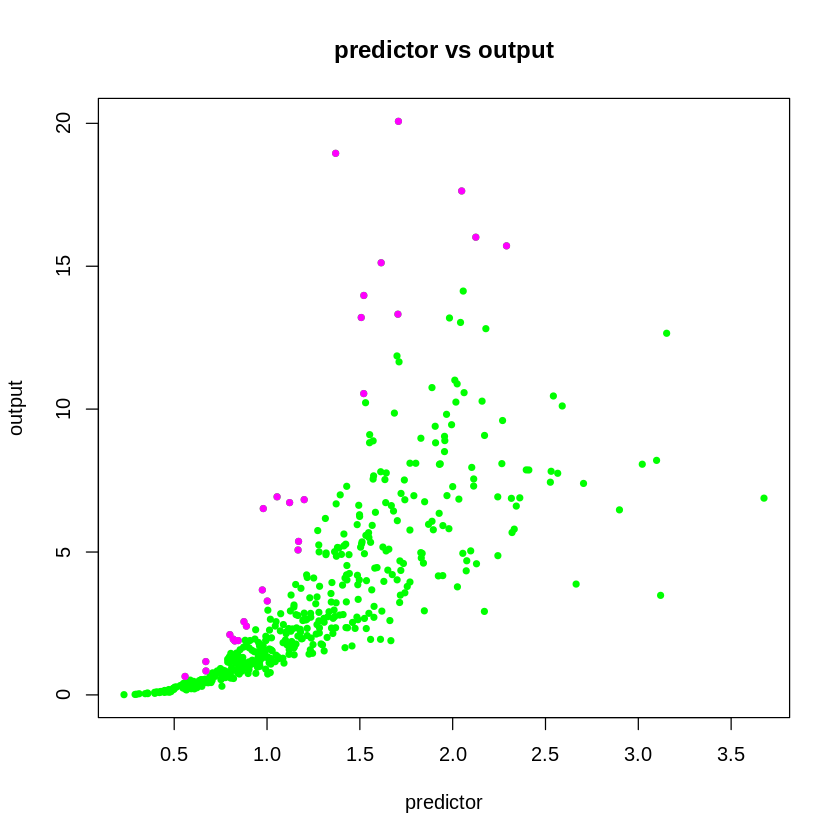

In [83]:
plot(data$predictor,data$output,main = 'predictor vs output', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')
points(data$predictor[anomalindex],data$output[anomalindex],col = "magenta",pch = 20)


In [84]:
variant <- 16

In [86]:
copulaNames <- c("normal", "student","frank","clayton")
copulaName <-copulaNames[copulanum]
copulaName

[1] "clayton"

In [87]:
myResult <- list(variant = variant,
                 copulaName = copulaName,
                 predictor.copula = predictor.copula,
                 output.copula = output.copula,
                 best_parameters = best_parameters,
                 anomal_predictor= anomal_predictor,
                 anomal_output= anomal_output)

saveRDS(myResult,"result.rds")